In [1]:
import csv
import numpy as np
import math

In [5]:
# read the dataset
file = open("../data/iris.csv", "r")
dataset = csv.reader(file)
dataset = np.array(list(dataset))
# delete the first row
dataset = np.delete(dataset, 0, 0)
# delete the first column on the table
dataset = np.delete(dataset, 0, 1)
file.close()

In [6]:
# splitting dataset
trainingSet = dataset[:149]
testingSet = dataset[149:]

In [7]:
# compute function
def computeDistance(dataPoint1, dataPoint2):
  result = 0
  for i in range(4):
    result += (float(dataPoint1[i]) - float(dataPoint2[i]))**2
  return math.sqrt(result)

In [8]:
def computeKnearestNeighbor(trainingSet, item, k):
  # add distance list
  distances = []
  for dataPoint in trainingSet:
    distances.append(
        {
            "label": dataPoint[-1],
            "value": computeDistance(item, dataPoint)
        }
    )
  # sort by distance
  distances.sort(key=lambda x: x["value"])
  # take the label by sorted distance
  labels = [item["label"] for item in distances]
  # return top k 
  return labels[:k]

In [10]:
def voteTheDistances(array):
  # take the non-duplicated labels
  labels = set(array)
  result = ""
  maxOccur = 0
  # count every label
  for label in labels:
    num = array.count(label)
    # find the highest occurences
    if(num > maxOccur):
      maxOccur = num
      result = label
  # return the result
  return result

In [11]:
k = 5
# print(testingSet)
for item in testingSet:
  knn = computeKnearestNeighbor(trainingSet, item, k)
  result = voteTheDistances(knn)
  # print the result 
  print("GT = ", item[-1], ", Prediction: =", result)

GT =  Iris-virginica , Prediction: = Iris-virginica


### How to select K in K-NN

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the dataset in
dataset = pd.read_csv(url, names = names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
# splitting the features and the results
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [15]:
# split train/ test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
X_test

array([[-0.04622511,  2.3720024 , -1.48043619, -1.31466572],
       [-0.89033581, -1.240184  , -0.4597716 , -0.15276803],
       [ 0.91847283, -0.03612186,  0.33407864,  0.2345312 ],
       [-0.52857408,  2.13118998, -1.4237326 , -1.05646624],
       [ 2.48610699,  1.89037755,  1.46815041,  1.00912966],
       [ 0.5567111 ,  0.68631542,  0.50418941,  0.49273069],
       [ 1.28023456,  0.20469056,  0.73100376,  1.39642889],
       [-0.89033581,  1.89037755, -1.08351107, -1.05646624],
       [-1.37268478,  0.44550299, -1.25362184, -1.31466572],
       [ 1.28023456,  0.44550299,  1.07122529,  1.39642889],
       [-0.2873996 , -0.75855914,  0.22067147,  0.10543146],
       [-0.52857408,  2.13118998, -1.19691825, -1.05646624],
       [ 1.52140905, -0.03612186,  1.18463247,  1.13822941],
       [ 0.67729835,  0.44550299,  0.39078223,  0.36363094],
       [ 0.19494938, -0.27693429,  0.39078223,  0.36363094],
       [-1.73444651,  0.44550299, -1.4237326 , -1.31466572],
       [-0.04622511, -0.

In [22]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit for training not to leak data out 
scaler.fit(X_train)

# except the X_test with the form of the X_train
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# predict 
y_pred = classifier.predict(X_test)
# check diff prediction vs reality
y_pred != y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [25]:
# measurements
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(y_test, y_pred),2))

0.97


In [27]:
# other measurements
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Accuracy')

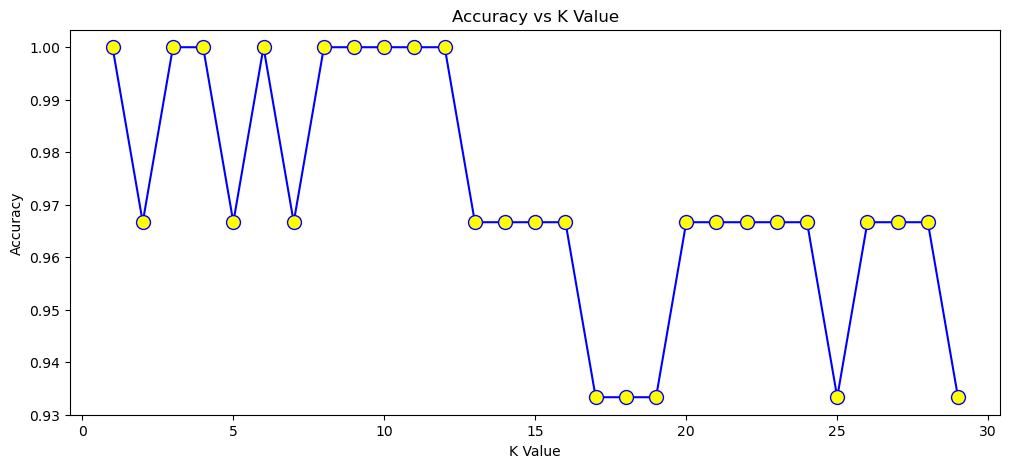

In [28]:
error = []
# calculate with different k 
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(accuracy_score(pred_i,y_test))

# plot it 
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')